# LIBRARIES INSTALL

In [20]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
import nltk
import re

In [2]:
dataset = pd.read_csv('IMDB Dataset.csv')

In [3]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
# Checking dataset have any null value
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
#target feature ordinal encode
dataset.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)

# EDA

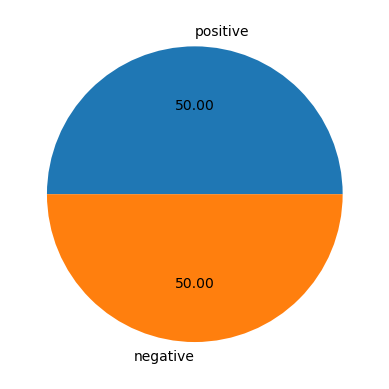

In [6]:
# Checking target feature is balance or unbalanced 
plt.pie(dataset['sentiment'].value_counts(),labels=['positive','negative'],autopct='%0.2f')
plt.show()

In [6]:
# calcuate number of characters
dataset['number of characters']=dataset['review'].apply(lambda char: len(char))

In [7]:
# Calculate number of words
dataset['number of words']=dataset['review'].apply(lambda words: len(nltk.word_tokenize(words)))

In [8]:
# Calculate number of sentence
dataset['number of sentence']=dataset['review'].apply(lambda sentence: len(nltk.sent_tokenize(sentence)))

In [9]:
dataset

,review,sentiment,number of characters,number of words,number of sentence
0,One of the other reviewers has mentioned that ...,1,1761,380,10
1,A wonderful little production. <br /><br />The...,1,998,201,7
2,I thought this was a wonderful way to spend ti...,1,926,205,4
3,Basically there's a family where a little boy ...,0,748,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,1,1008,241,8
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,642,138,3
49997,I am a Catholic taught in parochial elementary...,0,1280,271,6
49998,I'm going to have to disagree with the previou...,0,1234,240,8


In [10]:
dataset[dataset['sentiment']==1][['number of words','number of sentence','number of characters']].describe()

,number of words,number of sentence,number of characters
count,25000.000000,25000.000000,25000.000000
mean,280.357840,10.456000,1324.797680
std,214.398757,7.910758,1031.492627
min,11.000000,1.000000,65.000000
25%,148.000000,6.000000,691.000000
50%,207.000000,9.000000,968.000000
75%,343.000000,13.000000,1614.000000
max,2911.000000,282.000000,13704.000000


In [11]:
dataset[dataset['sentiment']==0][['number of words','number of sentence','number of characters']].describe()

,number of words,number of sentence,number of characters
count,25000.000000,25000.000000,25000.000000
mean,278.609120,11.026880,1294.064360
std,201.294517,7.880229,945.892669
min,8.000000,1.000000,32.000000
25%,153.000000,6.000000,706.000000
50%,211.000000,9.000000,973.000000
75%,338.000000,13.000000,1567.250000
max,1936.000000,118.000000,8969.000000


In [12]:
# dataset for corr
corr_df=dataset[['sentiment','number of words','number of sentence','number of characters']]

<Axes: >

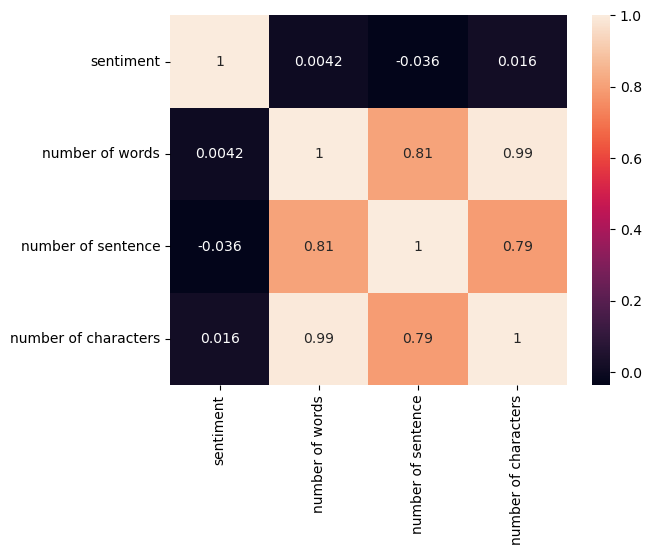

In [13]:
# correlation
sns.heatmap(corr_df.corr(),annot=True)

# NOTE: Using 20,000 rows out of 50,000
BECAUSE REQUIRED LOTE OF TIME TO TRAIN 50,000 ROWS 
FOR BETTER ACCURACY USE 50,000 ROWS

In [15]:
dataset=dataset.head(20000)
dataset.shape

(20000, 5)

In [16]:
dataset.iloc[6908]

review                  I must admit, this is one of my favorite horro...
sentiment                                                               1
number of characters                                                 4601
number of words                                                       961
number of sentence                                                     36
Name: 6908, dtype: object

## TEXT DATA PREPROCESSING


#### Convert text lower case 
#### Removing html tags
#### Word Tokenize
#### Removing stop words and punctuations
#### Stemming

In [26]:
def preprocessing(text):
    y=[]
    text=text.lower()
    text_pattern=re.compile('<.*?>')
    text=re.sub(text_pattern,' ',text)
    text =nltk.word_tokenize(text)
    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(nltk.stem.porter.PorterStemmer().stem(i))
    return " ".join(y)

In [28]:
dataset['review_transform']=dataset['review'].apply(preprocessing)

In [29]:
dataset.shape

(20000, 6)

In [30]:
dataset['review_transform'].apply(lambda x:len(nltk.word_tokenize(x)))

0        175
1         88
2         93
3         70
4        130
        ... 
19995     65
19996    290
19997    174
19998    110
19999    161
Name: review_transform, Length: 20000, dtype: int64

In [31]:
dataset

,review,sentiment,number of characters,number of words,number of sentence,review_transform
0,One of the other reviewers has mentioned that ...,1,1761,380,10,one review mention watch 1 oz episod 'll hook ...
1,A wonderful little production. <br /><br />The...,1,998,201,7,wonder littl product film techniqu unassuming-...
2,I thought this was a wonderful way to spend ti...,1,926,205,4,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,748,175,6,basic 's famili littl boy jake think 's zombi ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9,petter mattei 's `` love time money '' visual ...
...,...,...,...,...,...,...
19995,"ok. for starters, taxi driver is amazing. this...",0,697,154,9,ok. starter taxi driver amaz taxi driver amaz ...
19996,"It's sort of hard for me to say it, because I ...",0,2850,607,16,'s sort hard say greatli enjoy `` target '' ``...
19997,I still liked it though. Warren Beatty is only...,1,1942,438,24,still like though warren beatti fair comic boo...
19998,We could still use Black Adder even today. Ima...,1,997,198,12,could still use black adder even today imagin ...


In [32]:
dataset['sentiment'].value_counts()

sentiment
0    10097
1     9903
Name: count, dtype: int64

In [33]:
vector = TfidfVectorizer(ngram_range=(1,2),analyzer='word',max_features=5000,binary=True,sublinear_tf=True,norm='l2',use_idf=True)

In [34]:
x=vector.fit_transform(dataset['review_transform']).toarray()

In [35]:
y = dataset['sentiment'].values

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 , random_state=2)

In [37]:
lr=LogisticRegression(max_iter=100,solver='saga',class_weight=None,random_state=2)

In [38]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=2, solver='saga')

In [39]:
pred= lr.predict(x_test)

In [40]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.88525
[[1759  236]
 [ 223 1782]]
0.8830525272547076


# ..........** TESTING THE MODEL **........

#  NEGATIVE REVIEW 

In [43]:
inputs = '''Movie Title: The Room

Review:

The Room is a disaster of a film that fails on almost every level imaginable. The script is riddled with nonsensical dialogue and plot holes so large you could drive a truck through them. The story is incoherent, with subplots introduced and then forgotten, leaving viewers scratching their heads in confusion.

The acting is painfully bad, with Tommy Wiseau leading the charge as one of the most wooden performances ever captured on film. His line delivery is bizarre, and the chemistry between the characters is non-existent. It's hard to believe that anyone involved in this production thought they were making something of quality.

The film's direction and cinematography are equally atrocious, with awkward framing and scenes that drag on for far too long. The editing is choppy, making the already confusing story even harder to follow.

Despite all of this, The Room has somehow gained a cult following, perhaps because it’s so bad it’s almost entertaining in a trainwreck sort of way. But make no mistake—this is a movie that fails in every aspect of filmmaking and should be avoided by anyone looking for a coherent or enjoyable viewing experience. It's a film that resonates on a deeply human level, reminding us of the power of hope and the resilience of the human spirit. Simply put, it's a must-watch that will stay with you long after the credits roll.

'''

In [44]:
input_trans=preprocessing(inputs)
input_trans

"movi titl room review room disast film fail almost everi level imagin script riddl nonsens dialogu plot hole larg could drive truck stori incoher subplot introduc forgotten leav viewer scratch head confus act pain bad tommi wiseau lead charg one wooden perform ever captur film line deliveri bizarr chemistri charact non-exist 's hard believ anyon involv product thought make someth qualiti film 's direct cinematographi equal atroci awkward frame scene drag far long edit choppi make alreadi confus stori even harder follow despit room somehow gain cult follow perhap ’ bad ’ almost entertain trainwreck sort way make mistake—thi movi fail everi aspect filmmak avoid anyon look coher enjoy view experi 's film reson deepli human level remind us power hope resili human spirit simpli put 's must-watch stay long credit roll"

In [45]:
vector_input=vector.transform([input_trans])

In [46]:
result=lr.predict(vector_input)[0]

In [47]:
if result==1:
    print("Review is positive.....\033[32m THANK YOU...\033[0m")
else:
    print("Review is Negative.....\033[31m WE WILL WORK ON IT...\033[0m")    

Review is Negative..... WE WILL WORK ON IT...


# POSITIVE REVIEW

In [48]:
pos = '''Movie Title: The Shawshank Redemption

Review:

The Shawshank Redemption is a cinematic masterpiece that stands the test of time. The story of hope, friendship, and perseverance is beautifully told through the lens of an unjustly imprisoned man, Andy Dufresne. The film's pacing is perfect, allowing the characters to develop fully, and the bond between Andy and Red is one of the most touching relationships ever portrayed on screen.

The performances by Tim Robbins and Morgan Freeman are outstanding, with Freeman's narration adding a layer of depth and emotion that draws the audience in. The film's ending is both satisfying and uplifting, leaving viewers with a sense of closure and hope.

The cinematography, direction, and score all contribute to making The Shawshank Redemption a truly unforgettable experience. It's a film that resonates on a deeply human level, reminding us of the power of hope and the resilience of the human spirit. Simply put, it's a must-watch that will stay with you long after the credits roll.'''

In [49]:
input_trans=preprocessing(pos)

In [50]:
vector_input=vector.transform([input_trans])

In [51]:
result=lr.predict(vector_input)[0]

In [52]:
if result==1:
    print("Review is positive.....\033[32m THANK YOU...\033[0m")
else:
    print("Review is Negative.....\033[31m WE WILL WORK ON IT...\033[0m")    

Review is positive..... THANK YOU...


In [53]:
import pickle
pickle.dump(vector,open('vectorizer.pkl','wb'))
pickle.dump(lr,open('model.pkl','wb'))

In [55]:
pickle.dump(preprocessing,open('preprocessing.pkl','wb'))